In [22]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [23]:
# import data
df = pd.read_csv("../data/medical_examination.csv")
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [24]:
# get info on data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


# create all individual codes to be used in Function (see bottom)

In [25]:
# create "BMI" column
df['BMI'] = df["weight"]/((df["height"]/10)**(1/2))
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,15.126451
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,21.520712
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,15.755711
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,19.946674
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,14.178351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,18.542101
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,31.698740
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,24.545041
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,17.833587


In [26]:
# create "overweight" column and drop "BMI" column
df['overweight'] = np.where(df['BMI']>25,1,0)
df = df.drop(['BMI'], axis=1)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,0
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,0
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,0
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,0


In [27]:
# Normalize data by making 0 always good and 1 always bad. 
# If the value of 'cholesterol' or 'gluc' is 1, make the value 0. 
# If the value is more than 1, make the value 1.
df['gluc'] = np.where(df['gluc']>1,1,0)
df['cholesterol'] = np.where(df['cholesterol']>1,1,0)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,0
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,0
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,0
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,0
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,0


In [28]:
# filter data frame to only 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'
df_cat = df.filter(["cholesterol","gluc","smoke","alco","active","cardio","overweight"],axis=1)
df_cat

,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,0,0,0,1,0,0
1,1,0,0,0,1,1,0
2,1,0,0,0,0,1,0
3,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
69995,0,0,1,0,1,0,0
69996,1,1,0,0,1,1,1
69997,1,0,0,1,0,1,0
69998,0,1,0,0,0,1,0


In [29]:
# Create DataFrame for cat plot using `pd.melt` using just the filtered values 
df_cat = df_cat.melt(id_vars="cardio").sort_values(by=["cardio","variable"])
df_cat

,cardio,variable,value
280000,0,active,1
280004,0,active,0
280005,0,active,0
280006,0,active,1
280008,0,active,1
...,...,...,...
209993,1,smoke,0
209994,1,smoke,0
209996,1,smoke,0
209997,1,smoke,0


In [30]:
# Group and reformat the data to split it by 'cardio'. Show the counts of each feature.
df_cat=df_cat.value_counts().to_frame('total').reset_index().sort_values(by=["cardio","variable"])
df_cat

,cardio,variable,value,total
8,0,active,1,28643
15,0,active,0,6378
2,0,alco,0,33080
21,0,alco,1,1941
7,0,cholesterol,0,29330
16,0,cholesterol,1,5691
6,0,gluc,0,30894
17,0,gluc,1,4127
0,0,overweight,0,34144
23,0,overweight,1,877


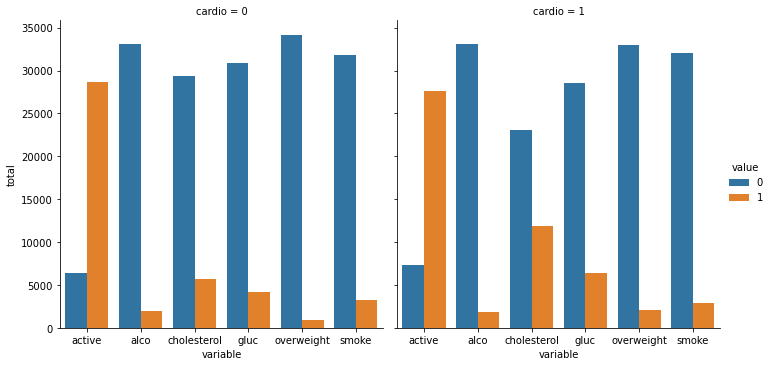

In [31]:
# Draw the catplot with 'sns.catplot()'
fig = sns.catplot(x="variable", y="total", hue="value", col="cardio", data=df_cat, kind="bar")

In [32]:
# Clean the data. Filter out the following patient segments that represent incorrect data:
# diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
# height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
# height is more than the 97.5th percentile
# weight is less than the 2.5th percentile
# weight is more than the 97.5th percentile

df_heat = df[df['ap_lo'] <= df['ap_hi']]
df_heat = df[df['height'] >= df['height'].quantile(0.025)]
df_heat = df[df['height'] <= df['height'].quantile(0.975)]
df_heat = df[df['weight'] >= df['weight'].quantile(0.025)]
df_heat = df[df['weight'] <= df['weight'].quantile(0.975)]
df_heat

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,0
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,0
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,0
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,0
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,0
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,0


In [33]:
# Calculate the correlation matrix
# Create a correlation matrix using the dataset. 
# Plot the correlation matrix using seaborn's heatmap(). 
# Mask the upper triangle. 
corr = df_heat.corr()
corr

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.003120,0.002321,-0.004658,-0.003559,0.003414,-0.002585,0.003941,0.000886,-0.003598,0.001080,0.003494,0.003029,-0.003761
age,0.003120,1.000000,-0.021693,-0.081044,0.065266,0.020703,0.018661,0.131435,0.088171,-0.045043,-0.028798,-0.010400,0.241494,0.015218
gender,0.002321,-0.021693,1.000000,0.493498,0.165414,0.005701,0.014955,-0.037085,-0.020268,0.338337,0.169876,0.006912,0.005299,-0.020919
height,-0.004658,-0.081044,0.493498,1.000000,0.304947,0.004879,0.005005,-0.056105,-0.025236,0.186168,0.092319,-0.005593,-0.016838,-0.038439
weight,-0.003559,0.065266,0.165414,0.304947,1.000000,0.029517,0.038265,0.128224,0.103992,0.065468,0.065371,-0.016151,0.176549,0.340588
ap_hi,0.003414,0.020703,0.005701,0.004879,0.029517,1.000000,0.015261,0.024174,0.012138,-0.001282,0.001096,0.000115,0.053637,0.016303
ap_lo,-0.002585,0.018661,0.014955,0.005005,0.038265,0.015261,1.000000,0.025398,0.012734,0.003759,0.011063,0.004340,0.063831,0.021162
cholesterol,0.003941,0.131435,-0.037085,-0.056105,0.128224,0.024174,0.025398,1.000000,0.380944,0.014381,0.041340,0.006279,0.204596,0.056026
gluc,0.000886,0.088171,-0.020268,-0.025236,0.103992,0.012138,0.012734,0.380944,1.000000,-0.002550,0.016200,-0.008318,0.089815,0.046583
smoke,-0.003598,-0.045043,0.338337,0.186168,0.065468,-0.001282,0.003759,0.014381,-0.002550,1.000000,0.341707,0.029033,-0.018151,-0.002959


<AxesSubplot:>

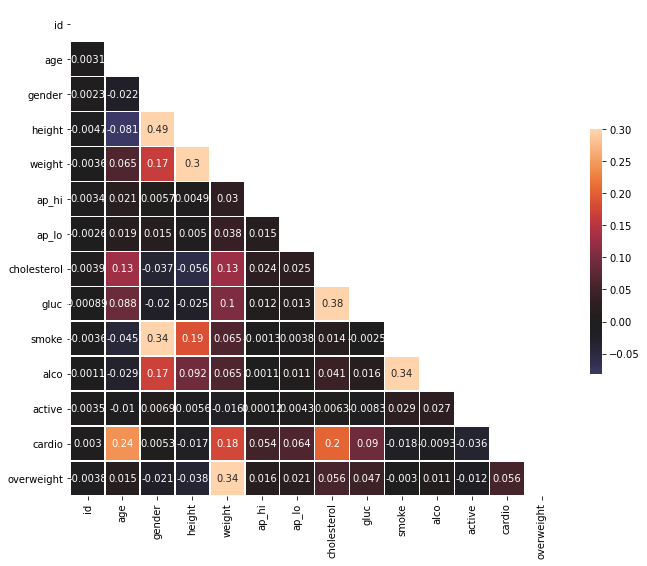

In [34]:
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, annot=True, mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# create Function using codes above

In [35]:
# Draw Categorical Plot
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    df_cat = df.filter(["cholesterol","gluc","smoke","alco","active","overwieght"],axis=1)
    df_cat = df_cat.melt(id_vars="cardio")

    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
    df_cat = df_cat.value_counts().to_frame('total').reset_index().sort_values(by=["cardio","variable"])

    # Draw the catplot with 'sns.catplot()'
    fig = sns.catplot(x="variable", y="total", hue="value", col="cardio", data=df_cat, kind="bar")


    # Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig

In [36]:
# Draw Heat Map
def draw_heat_map():
    # Clean the data
    df_heat = df[df['ap_lo'] <= df['ap_hi']]
    df_heat = df[df['height'] >= df['height'].quantile(0.025)]
    df_heat = df[df['height'] <= df['height'].quantile(0.975)]
    df_heat = df[df['weight'] >= df['weight'].quantile(0.025)]
    df_heat = df[df['weight'] <= df['weight'].quantile(0.975)]

    # Calculate the correlation matrix
    corr = df_heat.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(11, 9))

    # Draw the heatmap with 'sns.heatmap()'
    sns.heatmap(corr, annot=True, mask=mask, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig